In [1]:
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
from torch.distributions.normal import Normal
import numpy as np
from utils import *
from plots import *
from objectives import *
import sys
sys.path.append('/home/hao/Research/probtorch/')
import probtorch

In [2]:
iterations = 10000
num_samples = 20
p_mu = 0.0
p_sigma2 = 1.0

LEARNING_RATE = 1e-3
log_Z = np.log(np.sqrt((2*np.pi)))

q_mu = torch.tensor([4.0], requires_grad=True)
q_sigma = torch.tensor([2.0], requires_grad=True) 
optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)


In [3]:
ELBO, Mu, Sigma, Grad_mu, Grad_sigma, ESS = mc(num_samples, q_mu, q_sigma, p_mu, p_sigma2, iterations, optimizer)


iteration:0, ELBO:-10.027, ESS:2.052 (0s)
iteration:1000, ELBO:0.070, ESS:8.636 (0s)
iteration:2000, ELBO:0.756, ESS:15.072 (0s)
iteration:3000, ELBO:0.889, ESS:19.374 (0s)
iteration:4000, ELBO:0.920, ESS:19.886 (0s)
iteration:5000, ELBO:0.912, ESS:19.983 (0s)
iteration:6000, ELBO:0.918, ESS:19.999 (0s)
iteration:7000, ELBO:0.919, ESS:20.000 (0s)
iteration:8000, ELBO:0.922, ESS:20.000 (0s)
iteration:9000, ELBO:0.918, ESS:19.998 (0s)


In [4]:
eg_mu, eg2_mu, var_mu, snr_mu = SNR(np.array(Grad_mu), iterations, beta1=0.99, beta2=0.999)    
eg_sigma, eg2_sigma, var_sigma, snr_sigma = SNR(np.array(Grad_sigma), iterations, beta1=0.99, beta2=0.999)    

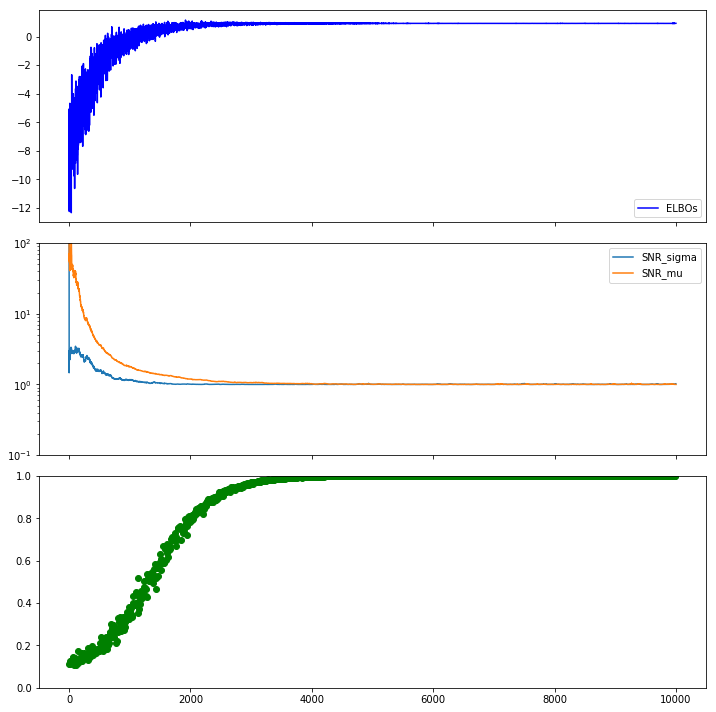

In [7]:
def plot_results(ELBO, ESS, num_samples, snr_mu, snr_sigma):
    fig = plt.figure(figsize=(10,10))
    ax1, ax2, ax3 = fig.subplots(3, 1, sharex=True)
    plt.tight_layout()
    ax1.plot(ELBO, 'b', label='ELBOs')
    ax1.legend()
    ## SNR
    ax2.set_yscale('log')
    ax2.plot(snr_sigma, label='SNR_sigma')
    ax2.plot(snr_mu, label='SNR_mu')
    ax2.legend()
    ax2.set_ylim([1e-1,1e2])
    ## ESS
    ess_ratio = np.array(ESS) / num_samples
    ave_ess = np.reshape(ess_ratio, (-1, 10)).mean(-1)
    N = ave_ess.shape[0]
    ax3.plot(np.arange(N) * 10, ave_ess, 'go', label='ESS')
    ax3.set_ylim([0, 1])
plot_results(ELBO, ESS, num_samples, snr_mu, snr_sigma)